In [46]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
import sklearn
print(sklearn.__version__)

1.2.2


In [48]:
path = "bodyfat.csv"
data = pd.read_csv(path)
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Distribution plots between Density and Body Fat


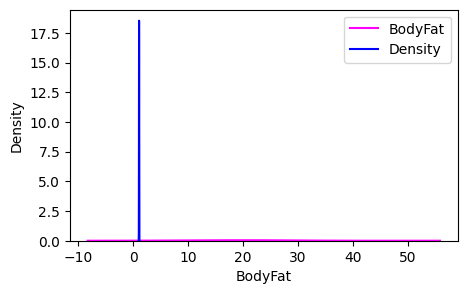

Distribution plots between BodyFat and Body Fat


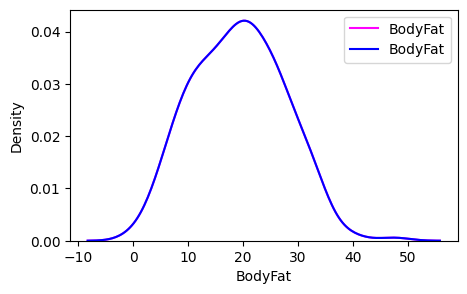

Distribution plots between Age and Body Fat


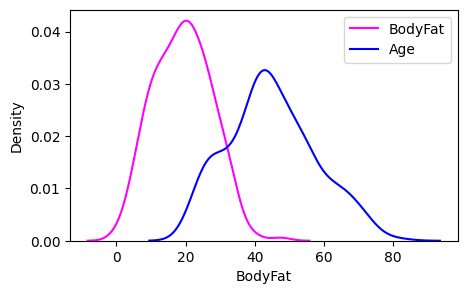

Distribution plots between Weight and Body Fat


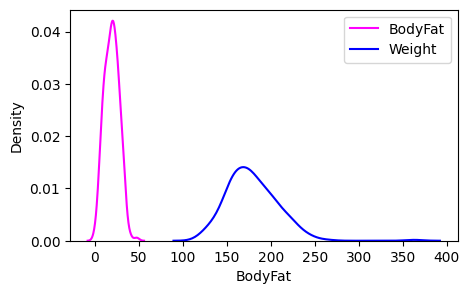

Distribution plots between Height and Body Fat


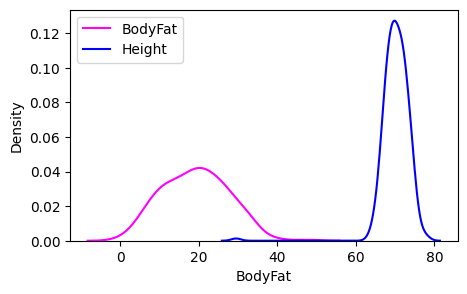

Distribution plots between Neck and Body Fat


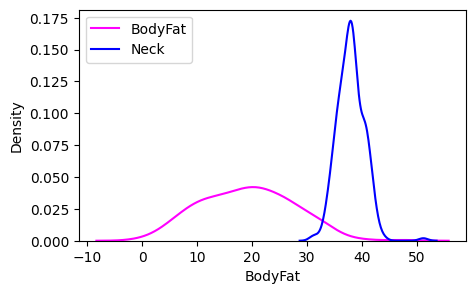

Distribution plots between Chest and Body Fat


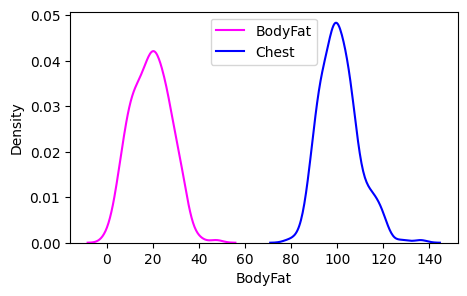

Distribution plots between Abdomen and Body Fat


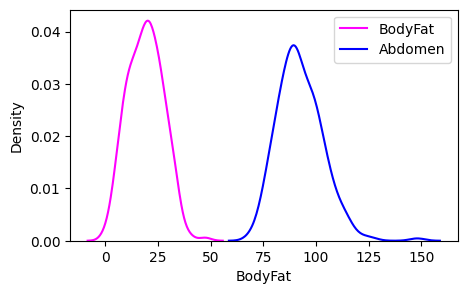

Distribution plots between Hip and Body Fat


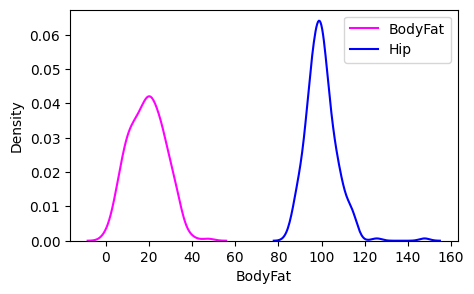

Distribution plots between Thigh and Body Fat


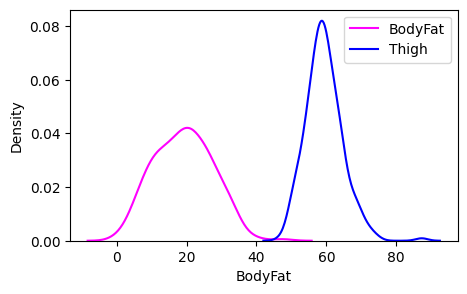

Distribution plots between Knee and Body Fat


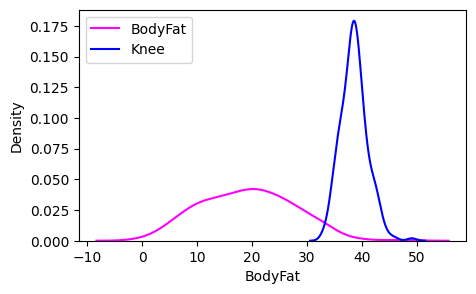

Distribution plots between Ankle and Body Fat


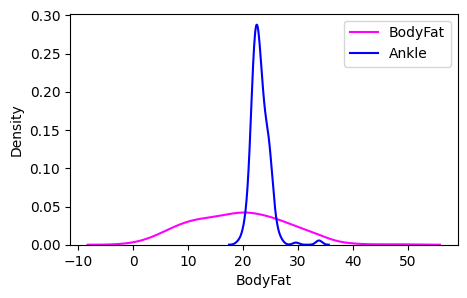

Distribution plots between Biceps and Body Fat


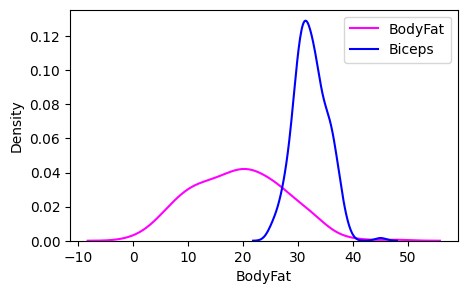

Distribution plots between Forearm and Body Fat


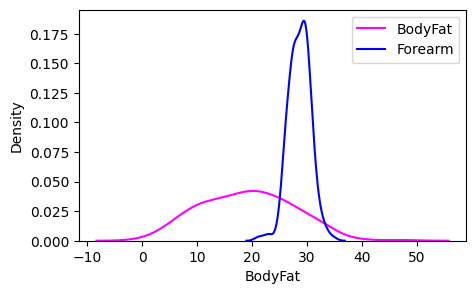

Distribution plots between Wrist and Body Fat


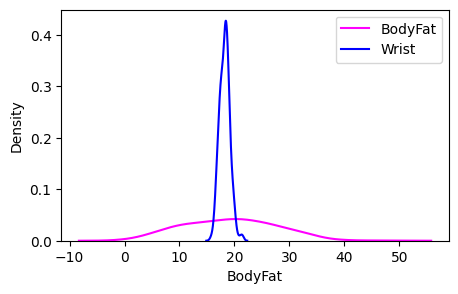

In [50]:
#Plot the distribution plot(kde : Kernel Density plot)
def dist_plot(cols):
    plt.figure(figsize=(5,3))
    
    sn.kdeplot(data['BodyFat'],  color = 'magenta', label = 'BodyFat')
    sn.kdeplot(data[cols],  color='blue', label=cols)
    plt.legend()
    plt.show()

for i in list(data.columns):
    print(f'Distribution plots between {i} and Body Fat')
    dist_plot(i)
    
    

In [51]:
# the above gives a a vagues idea about the distribution types, those distributions which are completely different when compared to body fat, those variables are not good features,
#hence such features can be ignored, eg: ankle and bodyfat, wrist and bodyfat

Distributions plots for Density are : 


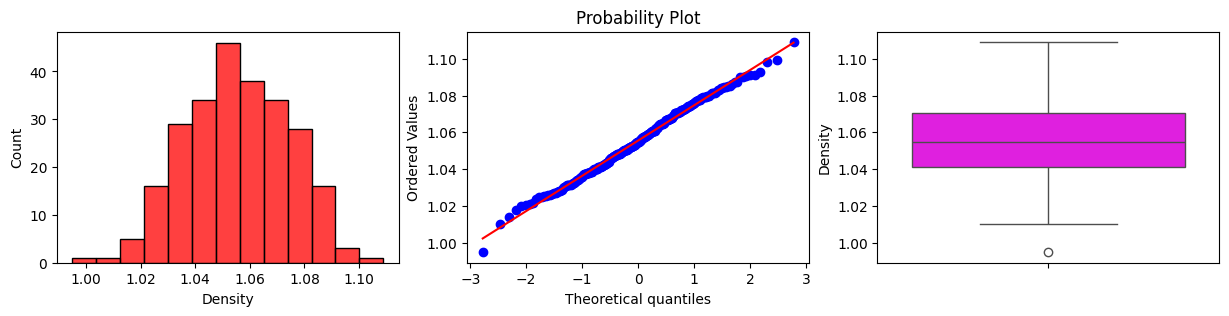

Distributions plots for BodyFat are : 


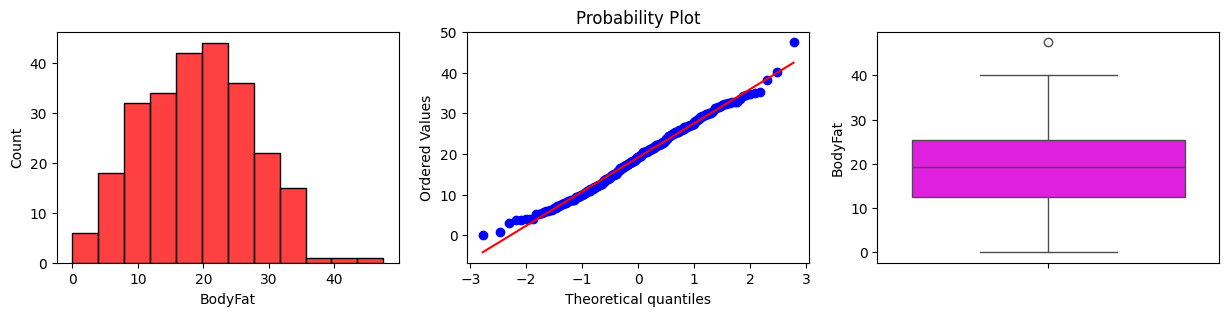

Distributions plots for Age are : 


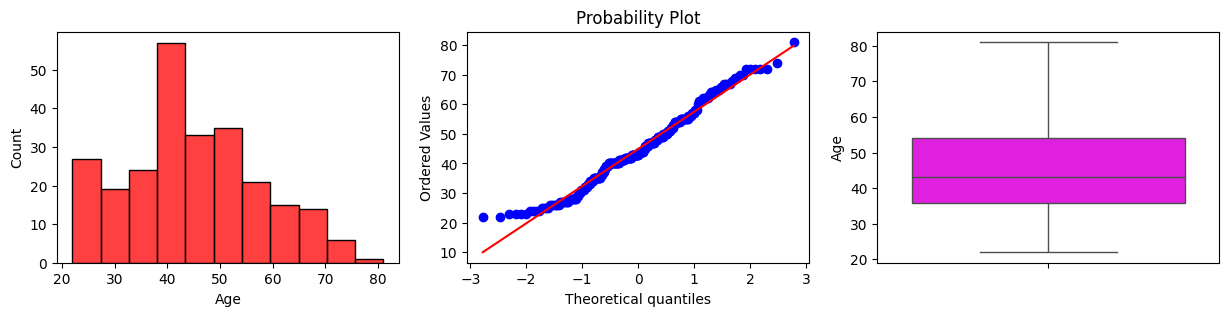

Distributions plots for Weight are : 


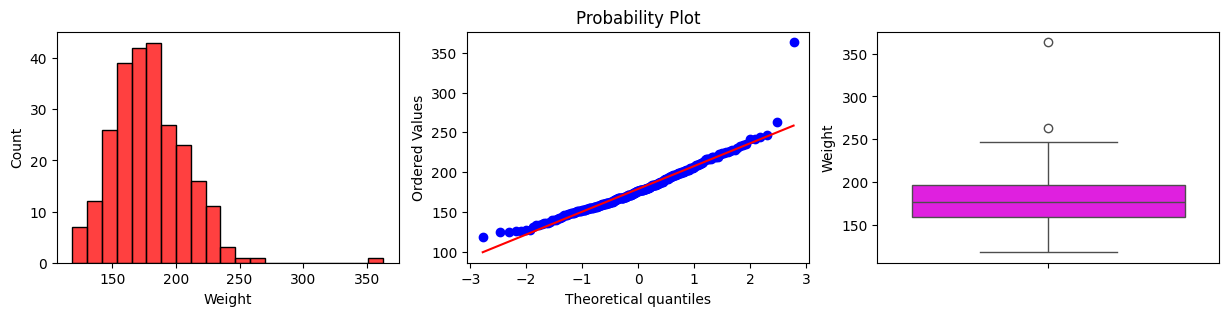

Distributions plots for Height are : 


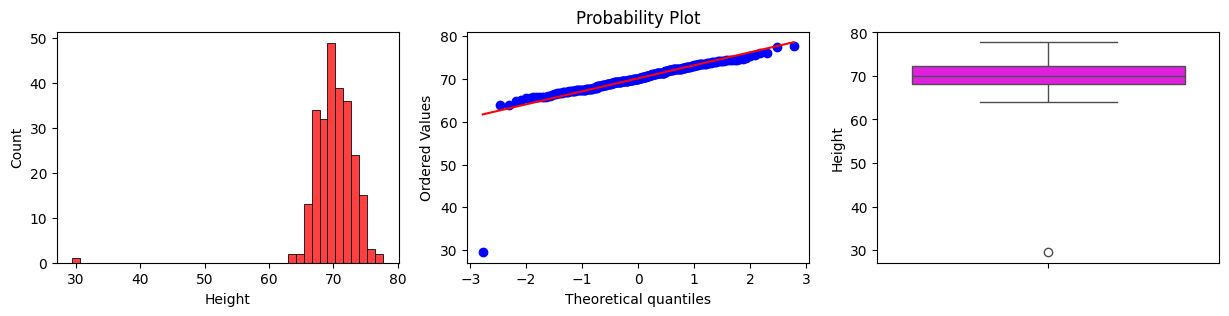

Distributions plots for Neck are : 


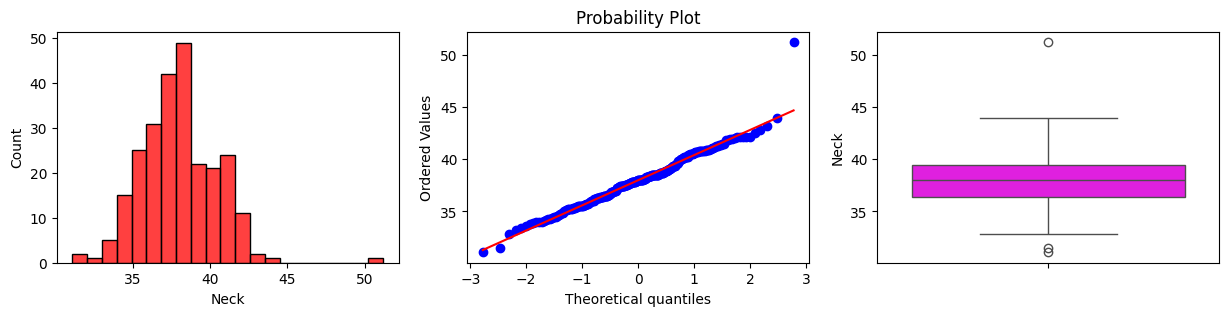

Distributions plots for Chest are : 


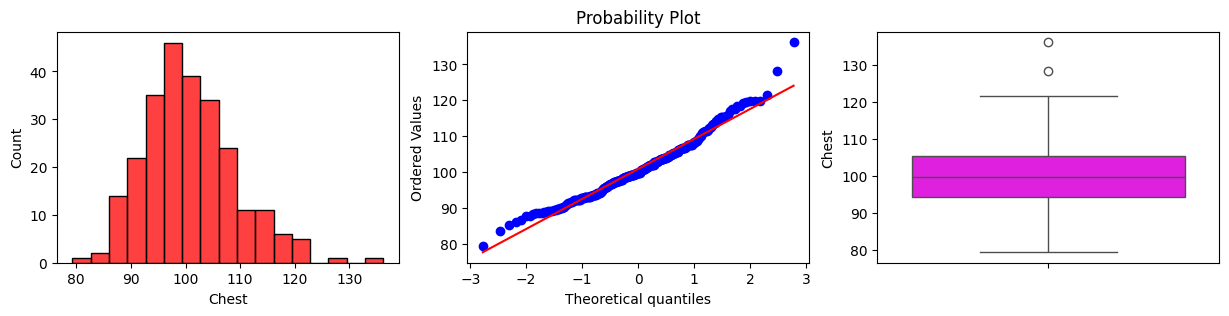

Distributions plots for Abdomen are : 


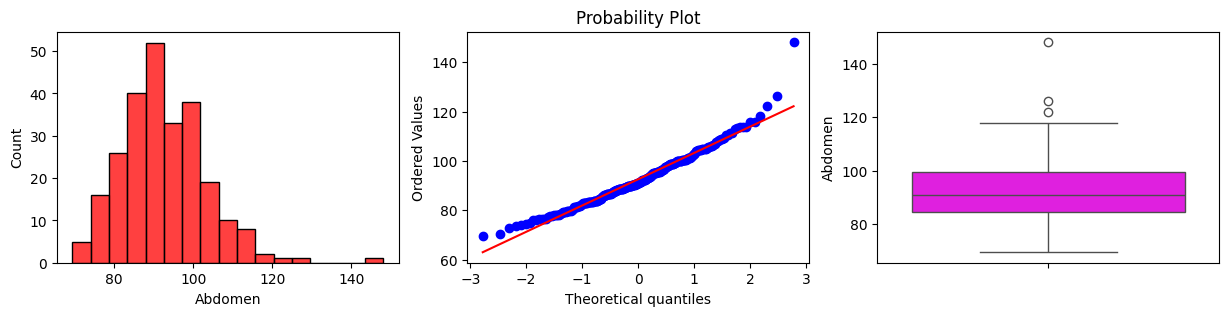

Distributions plots for Hip are : 


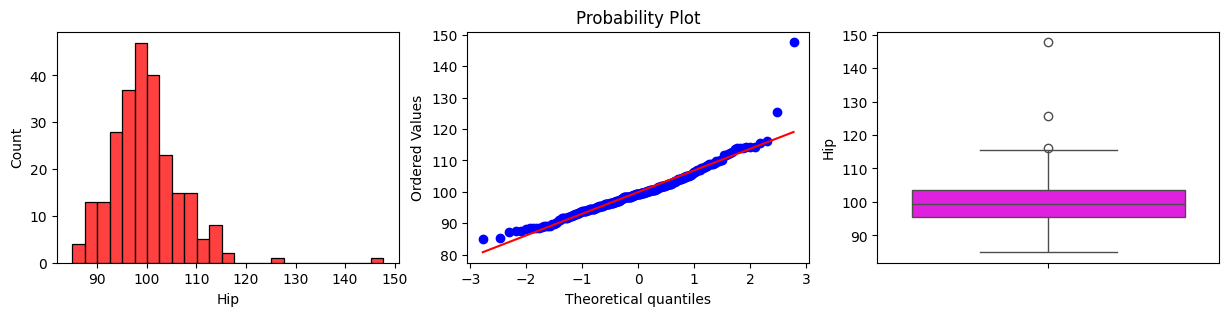

Distributions plots for Thigh are : 


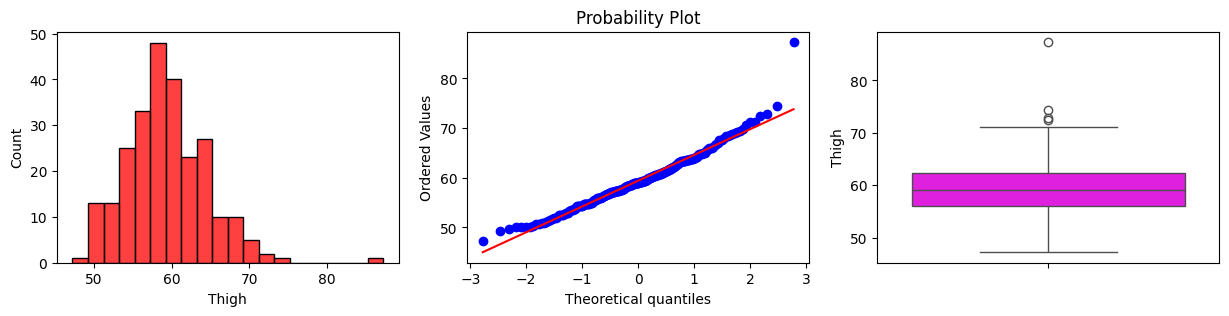

Distributions plots for Knee are : 


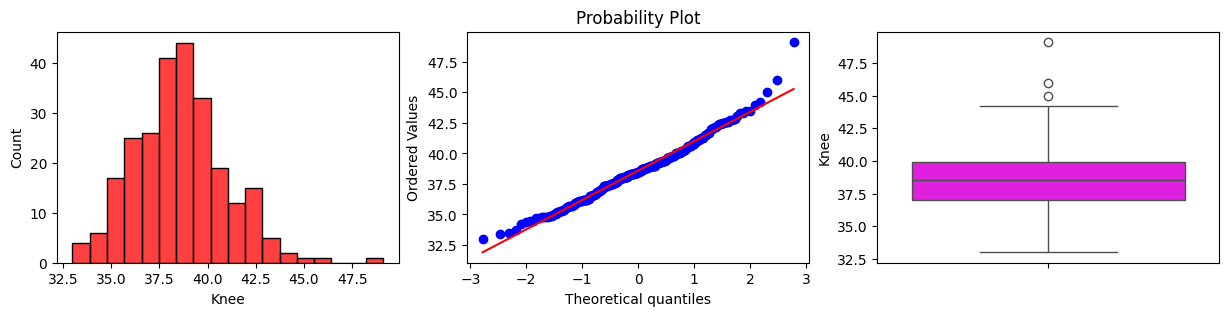

Distributions plots for Ankle are : 


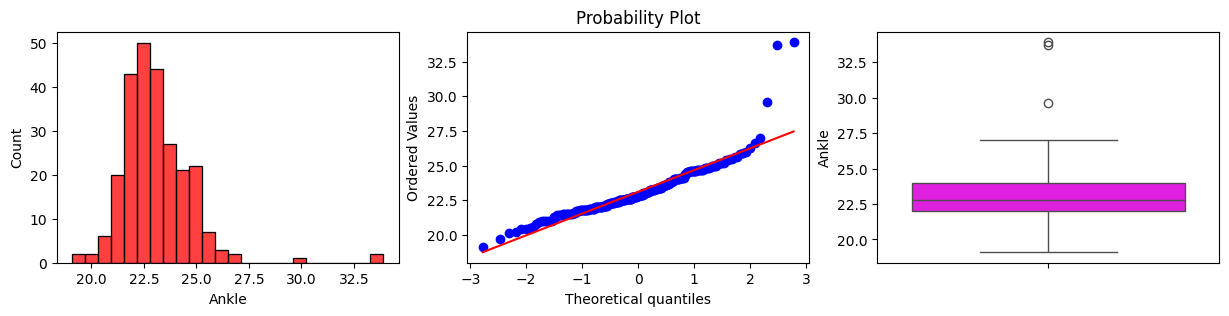

Distributions plots for Biceps are : 


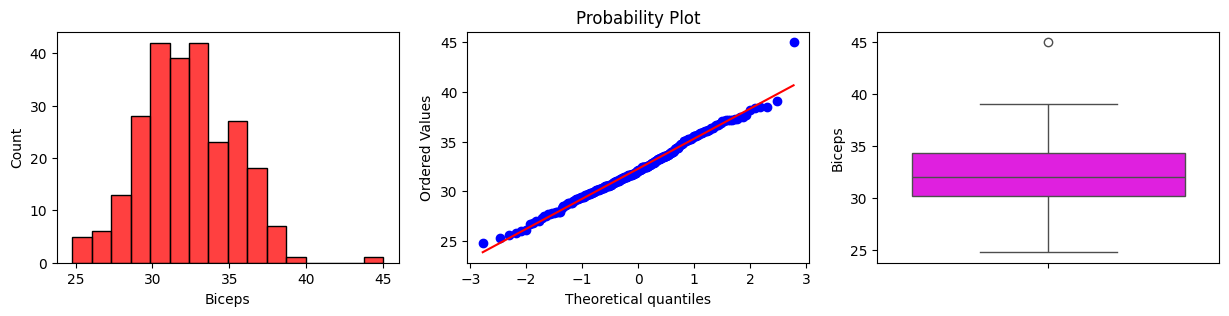

Distributions plots for Forearm are : 


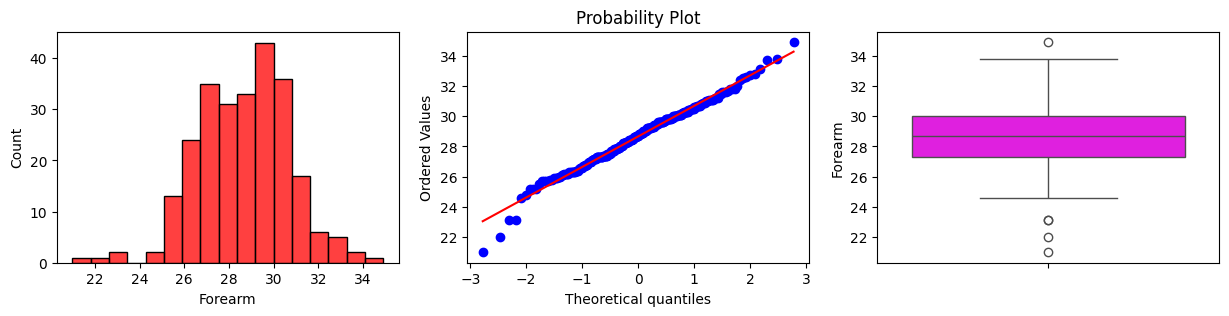

Distributions plots for Wrist are : 


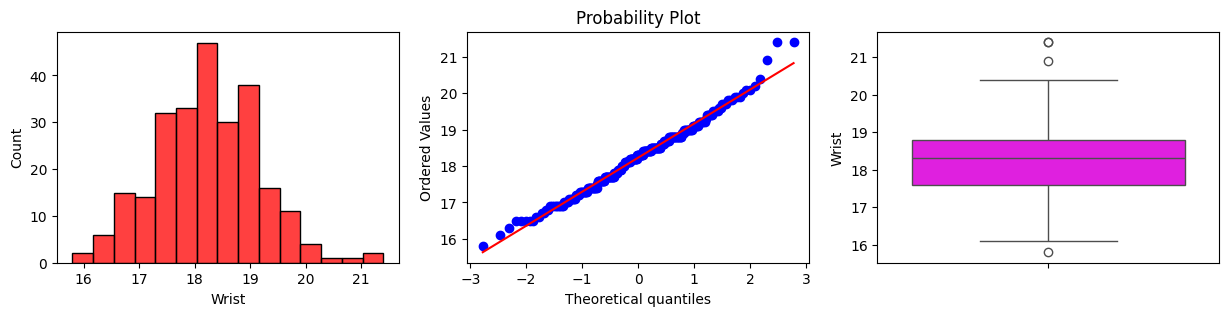

In [52]:
import scipy.stats as stat
#Check for outliers.. plot the histogram, normal distribution plot, and box plot next to each other
def three_plot(cols):
    plt.figure(figsize=(15,3))
    plt.subplot(1,3,1) #1st row 3 cols.. 1st data
    sn.histplot(data[cols], color='red')
    plt.subplot(1,3,2) #1st row 3 cols.. 1st data
    stat.probplot(data[cols], dist = 'norm', plot = plt)
    plt.subplot(1,3,3) #1st row 3 cols.. 1st data
    sn.boxplot(data[cols], color='magenta')
    
    plt.show()
    
for i in list(data.columns):
    print(f'Distributions plots for {i} are : ')
    three_plot(i)
    

In [53]:
#the probability plot shows how each point (data ) is distributed when compared to  the mean.. i.e the variation of the data points from its mean.. 
#to plot this.. each point from kde plot is taken, and is passed to the formula z = x-(mean)/(std).. and points are ploteed, then line of best fit is passed through it.

In [54]:
#outlier check:
#since all the curves are mostly guassian curves(i.e perfect kde distribution)
# hence we are using mean() +-3*std method to check the outlier, i.e we consider any point within the distance of 3 std.
upper_limit = []
lower_limit = []
for i in list(data.columns):
    upper_limit.append(data[i].mean() + (3*data[i].std()))
    lower_limit.append(data[i].mean() - (3*data[i].std()))


In [55]:
pd.DataFrame({
    'Upper Limit': upper_limit,
    'Lower Limit': lower_limit
}, index=data.columns)


,Upper Limit,Lower Limit
Density,1.112668,0.998480
BodyFat,44.257015,-5.955428
Age,82.691040,7.078801
Weight,267.091884,90.756925
Height,81.137377,59.160242
Neck,45.284803,30.699324
Chest,126.115633,75.532780
Abdomen,124.905183,60.206722
Hip,121.396935,78.412589
Thigh,75.155808,43.656096


In [56]:

cols = list(data.columns)
for i in range(len(cols)):
    
    temp = data[(data.iloc[:,i]>upper_limit[i]) | (data.iloc[:,i]<lower_limit[i])]

temp
                      

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
40,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4


In [57]:
#there are two outliers.. one in weight and another in neck.
#to treat these outliers we replace these values with 99.3% and .05% data
# Treat outliers based on percentiles
for i, col in enumerate(data.columns):
    ul = np.percentile(data[col], 99.3)
    ll = np.percentile(data[col], 0.05)
    data[col] = np.where(data[col] > upper_limit[i], ul, data[col])
    data[col] = np.where(data[col] < lower_limit[i], ll, data[col])
        


In [58]:
#check if the outliers are removed
cols = list(data.columns)
for i in range(len(cols)):
    
    temp = data[(data.iloc[:,i]>upper_limit[i]) | (data.iloc[:,i]<lower_limit[i])]

temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [59]:
#next we move to feature selection.. This has 4 major steps.
#Step 1: Apply Extra Tress Regressor
#first divide the dataset into train and test
train = data.drop("BodyFat", axis = 1)
test = data["BodyFat"]

In [60]:
#import Extra Trees Regreoor
from sklearn.ensemble import ExtraTreesRegressor
#create an object for that
er = ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

<Axes: >

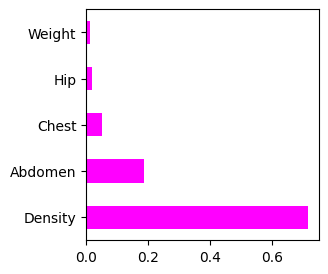

In [61]:
#use feature importance to check top features
seiries = pd.Series(er.feature_importances_, index= train.columns)
#plotting the top 5 features
plt.figure(figsize=(3,3))
seiries.nlargest(5).plot(kind = 'barh',color = 'magenta')

<Axes: >

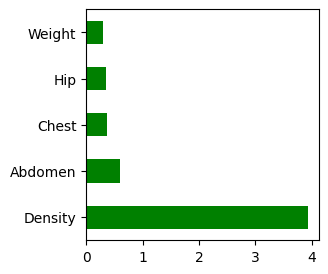

In [62]:
#Step 2 : Use mutual info regression
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(train, test)
plot_data = pd.Series(mr,index=train.columns)
plt.figure(figsize=(3,3))
plot_data.nlargest(5).plot(kind = 'barh', color = 'green')


<Axes: >

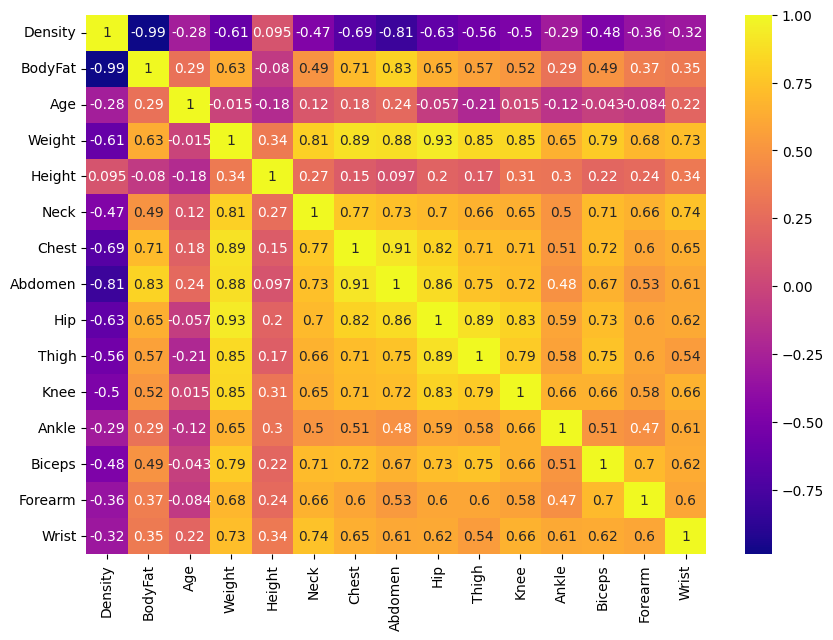

In [63]:
#here all the columns are similr..hence we can consider density, abdomen,chest and hip columns abd remove the rest
#Another check is to check for correlation
cormap = data.corr()
plt.figure(figsize=(10,7))
sn.heatmap(cormap, annot=True, cmap = 'plasma')


In [65]:
#there is too much correlation between a few columns,to check that we put the columns who have corr abovbe a certain threshhold in a set.

def cordata(data, thresh):
    #create an empty set, then store the final values here to avoid duplicates
    corval = []
    cormap = data.corr()
    """i.e for each cell we get the cellvalue using iloc[i][j], where i corresponds to the row value and j = col value.
    if the value >thresh then add it to the set
    """
    for i in range(len(cormap)):
        for j in range(i):
            if abs(cormap.iloc[i][j])>thresh:
                corval.append((cormap.columns[i], cormap.columns[j]))
                
    return corval

set = cordata(data,0.85)
set
    

[('BodyFat', 'Density'),
 ('Chest', 'Weight'),
 ('Abdomen', 'Weight'),
 ('Abdomen', 'Chest'),
 ('Hip', 'Weight'),
 ('Hip', 'Abdomen'),
 ('Thigh', 'Weight'),
 ('Thigh', 'Hip')]

In [66]:
#hence we find there is high correlation betwen abdomen and weight and sbdomen and chest.. as well as between hip and weight...
#hence we can keep either of these values
#4th Step calculate the variance inflation factor

In [67]:
#import VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
data.values

array([[ 1.0708, 12.3   , 23.    , ..., 32.    , 27.4   , 17.1   ],
       [ 1.0853,  6.1   , 22.    , ..., 30.5   , 28.9   , 18.2   ],
       [ 1.0414, 25.3   , 22.    , ..., 28.8   , 25.2   , 16.6   ],
       ...,
       [ 1.0328, 29.3   , 72.    , ..., 31.3   , 27.2   , 18.    ],
       [ 1.0399, 26.    , 72.    , ..., 30.5   , 29.4   , 19.8   ],
       [ 1.0271, 31.9   , 74.    , ..., 33.7   , 30.    , 20.9   ]])

In [69]:
#data.shape[1] i.e len of columns
vif_data = pd.DataFrame([variance_inflation_factor(data,i) for i in range(len(data.columns))], index = data.columns, columns=["VIF"])
vif_data

,VIF
Density,3888.138761
BodyFat,34.307943
Age,31.999561
Weight,1297.176082
Height,734.233791
Neck,1106.443155
Chest,1464.350918
Abdomen,1299.582157
Hip,3102.453401
Thigh,1022.720635


<Axes: >

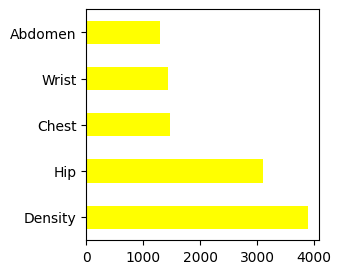

In [70]:
#plot the top 5 VIF scores, generally the ideal approach is to drpo the features with high VIF score, hoowever here we retail Density, and other features with high multicollinearity as other features are not much related.
plt.figure(figsize=(3,3))
vif_data["VIF"].nlargest(5).plot(kind = 'barh', color = 'yellow')



In [104]:
#hence we see that hight collieniearity for for Density followed by Hip, chest, waist and abdomen.. we are geeting the same columns using ER and MR as well..
#hence we keep these columns and remove the rest
#trying with height weight abdomen chest and hip
train_data = train[["Density","Hip","Chest","Abdomen","Weight" ]]

In [105]:
#Model building
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge

[Text(0.48580452127659574, 0.9545454545454546, 'x[0] <= 1.054\nsquared_error = 68.534\nsamples = 201\nvalue = 19.356'),
 Text(0.19966755319148935, 0.8636363636363636, 'x[0] <= 1.036\nsquared_error = 21.254\nsamples = 100\nvalue = 26.285'),
 Text(0.07606382978723404, 0.7727272727272727, 'x[0] <= 1.027\nsquared_error = 7.229\nsamples = 36\nvalue = 31.452'),
 Text(0.023404255319148935, 0.6818181818181818, 'x[0] <= 1.016\nsquared_error = 3.838\nsamples = 13\nvalue = 34.384'),
 Text(0.00851063829787234, 0.5909090909090909, 'x[4] <= 231.625\nsquared_error = 0.059\nsamples = 2\nvalue = 38.343'),
 Text(0.00425531914893617, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 38.586'),
 Text(0.01276595744680851, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(0.03829787234042553, 0.5909090909090909, 'x[0] <= 1.023\nsquared_error = 1.157\nsamples = 11\nvalue = 33.664'),
 Text(0.02127659574468085, 0.5, 'x[0] <= 1.019\nsquared_error = 0.106\nsamples = 5\nvalue = 34.76'),
 Text(0.017021276

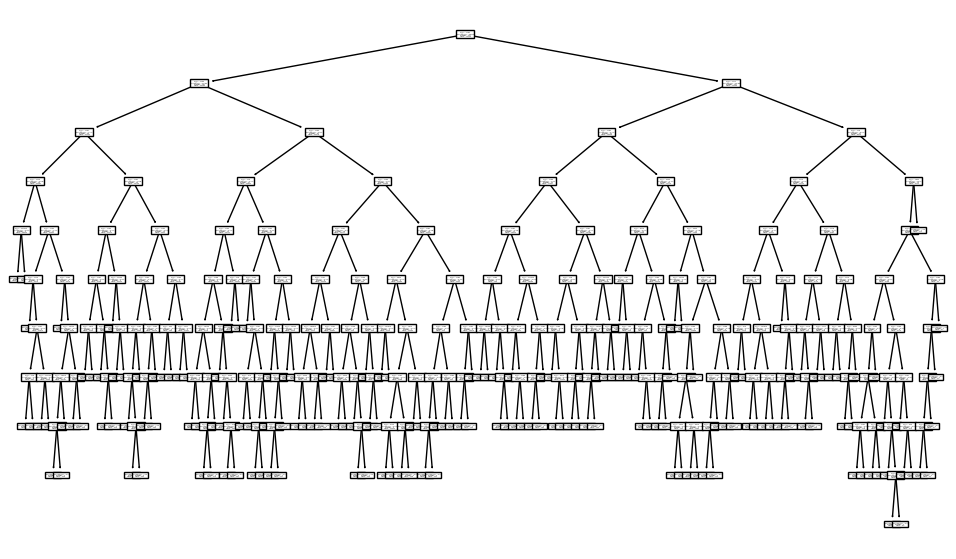

In [106]:
X_train, X_test, y_train, y_test = train_test_split(train_data, test, test_size=0.2, random_state=2)
#build the DC model, and plot the tree
dc = DecisionTreeRegressor()
dc.fit(X_train, y_train)
plt.figure(figsize=(12,7))
tree.plot_tree(dc)

In [107]:
#Next we prune the decission tree by its alpha value.. i.e we reduce the size of the tre.. Higher alpha value ,means the tree is more pruned.. hence less comples..
#Above tree is quite large
#to calculate ccp_alpha.. first we calculate the coost complexity for each node.. which is a combination of the trees size a,d its misclassification cost
path = dc.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [108]:
#next we create a dc for each ccp_alpha value
alpha_list = []
for i in range(len(ccp_alpha)):
    dc = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    dc.fit(X_train, y_train)
    alpha_list.append(dc)
alpha_list[1]    

DecisionTreeRegressor(ccp_alpha=5.656061578189852e-16)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


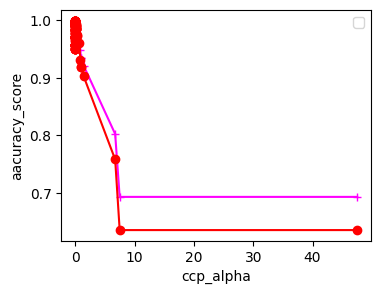

In [116]:
#next we calculate the score for these, and plot it to get the best ccp_alpha
#i.e we calculate the score for each Decission tree buit, hence alpha_list[i].score
train_score = [alpha_list[i].score(X_train, y_train) for i in range(len(alpha_list))]
test_score = [alpha_list[i].score(X_test, y_test) for i in range(len(alpha_list))]

#next we plot the chart
plt.figure(figsize=(4,3))
plt.xlabel('ccp_alpha')
plt.ylabel('aacuracy_score')
plt.plot(ccp_alpha, train_score, marker = '+', color = 'magenta')
plt.plot(ccp_alpha, test_score, marker = 'o', color = 'red')
plt.legend()
plt.show()

In [117]:
#hence we can see that for ccp_alpha values between 0-1 the score is highest.. plotting the Decission tree for ccp_alpha = 1
dc_model = DecisionTreeRegressor(ccp_alpha=1)
dc_model.fit(X_train, y_train)
dc_pred = dc_model.predict(X_test)
print(f"Accuracy Score for Normal Decission Tree is: {metrics.r2_score(y_test, dc_pred)}")

rf_model = RandomForestRegressor(ccp_alpha=1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Accuracy Score for Normal random Forest Tree is: {metrics.r2_score(y_test, rf_pred)}")


Accuracy Score for Normal Decission Tree is: 0.902513044842657
Accuracy Score for Normal random Forest Tree is: 0.9545627383725369


In [110]:
np.linspace(start=1, stop=1200, num= 10) #gives random numbers between 1 to 1200.. (10 random numbers sinec num = 10)

array([1.00000000e+00, 1.34222222e+02, 2.67444444e+02, 4.00666667e+02,
       5.33888889e+02, 6.67111111e+02, 8.00333333e+02, 9.33555556e+02,
       1.06677778e+03, 1.20000000e+03])

In [111]:
#Hyperturning the model
parameters_model = {
    'RandomForest':{
        'model':RandomForestRegressor(),
        'params':{
        'n_estimators':[int(x) for x in np.linspace(start = 1, stop = 1200, num = 10)],
        'max_depth':[int(x) for x in np.linspace(start = 10, stop = 30, num = 5)],
        'min_samples_split':[2,5,10,12],
        'min_samples_leaf' : [3,6,9],
        'criterion':['absolute_error','squared_error'],
        'ccp_alpha':[.08,1,1.5,1,2.5] }   
    },
      'DecissionTree':{
        'model':DecisionTreeRegressor(),
         'params':{
        'max_depth':[int(x) for x in np.linspace(start = 10, stop = 30, num = 5)],
        'min_samples_split':[2,5,10,12],
        'min_samples_leaf' : [3,6,9],
        'criterion':['absolute_error','squared_error'],
        'ccp_alpha':[.08,1,1.5,1,2.5]  }
    },

    'SVR':{
        'model':SVR(),
        'params':{
        'kernel':  ['linear','polynomial','rbf'],
        'C':[0.25,0.5,1,1.5,2],
        'tol':[1e-10,1e-5,.0025,.005,.1],
        'max_iter':[int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
        }
        
      }
        
    
}

In [112]:
score_list = []
for modelname, model in parameters_model.items():
    clf = RandomizedSearchCV(model['model'],param_distributions= model['params'],n_iter = 10,
                             cv = 5,n_jobs=1,scoring='neg_mean_squared_error')

    clf.fit(X_train, y_train)
    
    score_list.append({
        'model_name':model['model'],
        'Score':clf.best_score_,
        'Best_Estimator':clf.best_estimator_
    }
    )
score_pd = pd.DataFrame(score_list, columns= ['model_name', 'Score','Best_Estimator'])
score_pd

C:\Users\lexus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lexus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lexus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

,model_name,Score,Best_Estimator
0,RandomForestRegressor(),-2.056398,"(DecisionTreeRegressor(ccp_alpha=0.08, criteri..."
1,DecisionTreeRegressor(),-5.424462,"DecisionTreeRegressor(ccp_alpha=1, max_depth=1..."
2,SVR(),-41.287103,"SVR(C=1, max_iter=300, tol=0.0025)"


In [113]:
#building a model with the best parameter
#In neg mean squared error is same as mean squared error with negative sign, hence will look for the smallest, . i.e Random Forest here
score_pd['Best_Estimator'][0]

RandomForestRegressor(ccp_alpha=0.08, criterion='absolute_error', max_depth=30,
                      min_samples_leaf=9, min_samples_split=12,
                      n_estimators=800)

In [114]:
rf = score_pd['Best_Estimator'][0]
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f'Accuracy Score for hypertuned RF is :{metrics.r2_score(y_test,rf_pred)}')

Accuracy Score for hypertuned RF is :0.9703074330564901


In [118]:
#predict the train result and plotthe distribution of predicted and actual reult to check the changes in the distribution curve.
#for this 1st convert the train data to an array, then pass it to the model
train_array = np.array(X_train)
predicted = []
for i in range(len(train_array)):
    predicted.append(rf_model.predict([train_array[i]]))

train_copy = X_train.copy()
train_copy["Predicted_Value"] = np.array(predicted)    
train_copy["Actual_Value"] = y_train    


C:\Users\lexus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lexus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lexus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lexus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base

In [100]:
train_copy

,Density,Weight,Abdomen,Chest,Hip,Predicted_Value,Actual_Value
155,1.0594,171.50,83.5,92.1,98.3,16.614813,17.3
159,1.0477,177.25,92.4,101.1,99.3,22.316464,22.5
157,1.0761,182.50,90.8,98.5,102.5,9.485574,10.0
122,1.0652,160.25,83.3,99.3,97.5,16.048532,14.7
64,1.0264,205.50,105.5,105.3,108.3,31.912470,32.3
...,...,...,...,...,...,...,...
22,1.0631,140.25,76.4,86.0,94.6,16.315832,15.6
72,1.0796,160.75,82.9,93.6,96.3,8.455172,8.5
237,1.0372,219.15,113.8,117.6,111.8,27.446537,27.3
15,1.0512,162.75,92.8,99.1,99.2,21.952457,20.9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


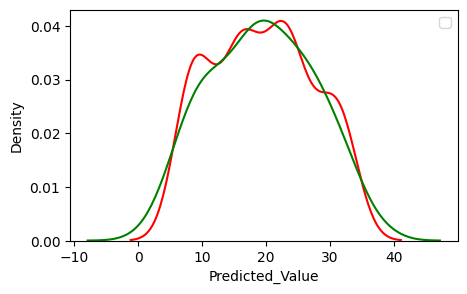

In [119]:
plt.figure(figsize=(5,3))
sn.kdeplot(train_copy['Predicted_Value'], color = 'red')
sn.kdeplot(train_copy["Actual_Value"], color = 'green')
plt.legend()
plt.show()

In [120]:
#hence the plot shape is also almost similar, hence we use Random Forst Regressor with the best parameters.

print(f'Accuracy Score for train data is: {metrics.r2_score(predicted,y_train)}')

Accuracy Score for train data is: 0.9633305248686916


In [121]:
#Prepare the ppickle file
import pickle
#open the file.. write it and then dump the model in the file
file = open('bodyfatmodel2.pkl','wb')
pickle.dump(rf,file)
file.close()